In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [
    [1., .23, .25, 16.43, 18.21, 4.94],
    [4.34, 1., 1.11, 71.4, 79.09, 21.44],
    [3.93, .9, 1., 64.52, 71.48, 19.37],
    [.061, .014, .015, 1., 1.11, .3],
    [.055, .013, .014, .9, 1., .27],
    [.2, .047, .052, 3.33, 3.69, 1.]
]
ccy = ['PLN', 'EUR', 'USD', 'RUB', 'INR', 'MXN']

In [89]:
ccy_df = pd.DataFrame(data, columns=ccy, index=ccy)
#ccy_df = ccy_df.apply(lambda x: -np.log(x))

In [4]:
ccy_df

,PLN,EUR,USD,RUB,INR,MXN
PLN,-0.000000,1.469676,1.386294,-2.799109,-2.901971,-1.597365
EUR,-1.467874,-0.000000,-0.104360,-4.268298,-4.370586,-3.065258
USD,-1.368639,0.105361,-0.000000,-4.166975,-4.269418,-2.963725
RUB,2.796881,4.268698,4.199705,-0.000000,-0.104360,1.203973
INR,2.900422,4.342806,4.268698,0.105361,-0.000000,1.309333
MXN,1.609438,3.057608,2.956512,-1.202972,-1.305626,-0.000000


In [5]:
import networkx as nx
import igraph as ig

In [6]:
w = []
for item in [[val for val in ccy_vals] for ccy_col, ccy_vals in ccy_df.items()]:
    for sub_item in item:
        w.append(sub_item)

In [7]:
g = ig.Graph.Adjacency((ccy_df > 0))
g.vs['names'] = [key for key in ccy]
g.es['weight'] = w

In [8]:
G = nx.DiGraph(ccy_df)

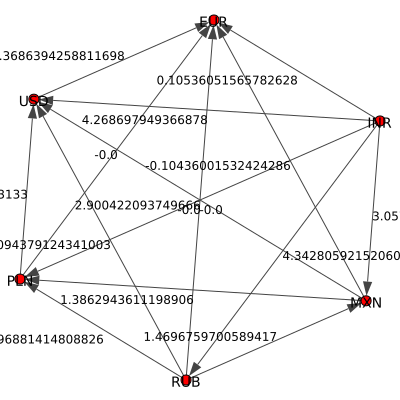

<Figure size 2000x2000 with 0 Axes>

In [9]:
# plot the graph
plt.figure(figsize=(20, 20))
ig.plot(g,
        vertex_size=10,
        vertex_label=g.vs['names'],
        edge_label=g.es['weight'],
        bbox=(400, 400)
        )

### TASK 1

In [82]:
# find arbitrage currencies pair such that r_ij * ... * r_ki > 1

vertex_num = len(ccy)
vertex_label_dict = {ccy_key: {'labeled': 0, 'value': float('inf')} for ccy_key in ccy}
vertex_label_dict['PLN']['value'] = 0
vertex_label_dict['PLN']['labeled'] = 1
start_vertex = 'PLN'
current_vertex = 'PLN'
all_labeled = False
counter = 0
current_path = f'{start_vertex}'
constructed_path = {}


for currency in ccy:
    vertex_label_dict = {ccy_key: {'labeled': 0, 'value': float('inf')} for ccy_key in ccy}
    vertex_label_dict[currency]['value'] = 0
    vertex_label_dict[currency]['labeled'] = 1
    start_vertex = currency
    current_vertex = currency
    all_labeled = False
    counter = 0
    current_path = f'{start_vertex}'
    
    
    while all_labeled != True:
        #print(f'iteration = {counter}\n')
        if i == 0:
            current_vertex = currenct #currency # dynamic change
            vertex_label_dict[current_vertex]['value'] = 0
            vertex_label_dict[current_vertex]['labeled'] = 1

        for next_vertex in ccy:
            #print(f'run vertex {next_vertex}')
            if next_vertex != start_vertex\
                and next_vertex != current_vertex\
                and vertex_label_dict[next_vertex]['labeled'] == 0:
                #print(f'process vertex {next_vertex}')
                calc_val_raw = ccy_df.loc[current_vertex, next_vertex]
                calc_val = vertex_label_dict[current_vertex]['value'] + ccy_df.loc[current_vertex, next_vertex]
                #print(f'calced value from {current_vertex} to {next_vertex} = {calc_val_raw}')
                if calc_val < vertex_label_dict[next_vertex]['value']:
                    #print(f'recalc from {current_vertex} to {next_vertex} = {calc_val}')
                    vertex_label_dict[next_vertex]['value'] = vertex_label_dict[current_vertex]['value'] + ccy_df.loc[current_vertex, next_vertex]
                    #vertex_label_dict[next_vertex]['labeled'] = 0
                else:
                    #vertex_label_dict[next_vertex]['labeled'] = 1
                    pass
            #print()

        #print(f'iteration = {i}')#, dict = {vertex_label_dict}')
        new_smallest = float('inf')
        #print(f'dropped smallest, {new_smallest}')
        for key in vertex_label_dict.keys():
            if vertex_label_dict[key]['labeled'] == 0:
                #print(f'unlabeled: {key}, value = {vertex_label_dict[key]["value"]}')
                new_smallest = min(new_smallest, vertex_label_dict[key]['value'])
        #print(f'new smallest = {new_smallest}')

        for key in vertex_label_dict.keys():
            if new_smallest == vertex_label_dict[key]['value']:
                current_vertex = key
                vertex_label_dict[current_vertex]['labeled'] = 1
        for key in vertex_label_dict.keys():
            if vertex_label_dict[key]['labeled'] == 0:
                vertex_label_dict[key]['value'] = float('inf')
        #print(f'next vertex to be current = {current_vertex}')
        #print(vertex_label_dict)

        current_path = current_path + ' -> ' + current_vertex
        constructed_path[current_path + ' -> ' + start_vertex] =\
            new_smallest + ccy_df.loc[current_vertex, start_vertex] 


        for key in vertex_label_dict.keys():
            #print(f'sanity, {key}, {vertex_label_dict[key]["labeled"]}')
            if vertex_label_dict[key]['labeled'] == 0:
                #print('break')
                all_labeled = False
                break
            #print('make true')
            all_labeled = True


In [92]:
print('Values below 0 mean that we can arbitrage')
for path, profit in constructed_path.items():
    if profit < 0:
        print(path.ljust(50), f'{profit:.5f}')

Values below 0 mean that we can arbitrage
PLN -> INR -> PLN                                  -0.00155
PLN -> INR -> RUB -> MXN -> USD -> PLN             -0.00477
EUR -> INR -> EUR                                  -0.02778
EUR -> INR -> RUB -> MXN -> EUR                    -0.00365
USD -> INR -> USD                                  -0.00072
USD -> INR -> RUB -> MXN -> USD                    -0.00357
MXN -> INR -> RUB -> PLN -> MXN                    -0.00075
